## Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. 
## The task is to understand what makes an app perform well - size? price? category? multiple factors together? we have to analyse and find some insights  that would be presented to business in form of visualisations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [2]:
pd.__version__

'1.1.3'

In [3]:
# Read file
df = pd.read_csv('E:\DS\py\Python_Assignment 1_BI\playstore_analysis.csv') 
df.tail()# 1038  nan

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,NaN,NaN,NaN
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up,NaN,NaN,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.00000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,NaN,NaN,NaN


# Q1. Data clean up-Missing value

## a) Drop records where rating is missing since rating is our target/study variable

In [4]:
df.dropna(subset=['Rating'],inplace=True)
df.tail()  # 1038,etc dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,NaN,NaN,NaN
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,NaN,NaN,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.00000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,NaN,NaN,NaN


## b) Check the null values for the Android Ver column

In [5]:
# i) yes all three records are having same problem

df[pd.isnull(df['Android Ver'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,NaN,NaN,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN,NaN,NaN,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,NaN,NaN


In [6]:
# ii) Drop the 3rd record i.e. record for “Life Made WIFI

df.drop([10472],inplace=True)        # Run 1st from starting cell
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,9367.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,NaN,NaN,NaN
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,NaN,NaN,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN


In [7]:
# iii) Replace remaining missing values with the mode  # see o/p of  bii)

df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)     
    
#check if it is null in this coln  #df[pd.isnull(df['Android Ver'])]

## c) Current ver – replace with most common value


In [8]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

#check null  df[pd.isnull(df['Current Ver'])]

# 
# Q2. Data clean up – correcting the data types

## a) Which all variables need to be brought to numeric types?

   ### Rating Reviews, Installs,size must be in numeric types  

## b) Price variable – remove $ sign and convert to float

In [9]:
df['Price']= df['Price'].str.replace('$','').astype('float')  

## c) Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [10]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype('int')   # converted to int

## d) Convert all other identified columns to numeric

In [11]:
df['Rating'] = pd.to_numeric(df['Rating'])         # converted to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])         # converted to Numeric
df['Size'] = pd.to_numeric(df['Size'])             # converted to numeic

# 
# Q3. Sanity checks – check for the following and handle accordingly

## a) Avg. rating should be between 1 and 5, as only these values are allowed on the play
## store.

In [12]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9366, dtype: float64

In [13]:
df['Rating'].between(1,5).any()      # All rows(9366) satisify condn

True

In [14]:
# i) Are there any such records? Drop if so.
print('No Such Records Found') 

No Such Records Found


## b) Reviews should not be more than installs as only those who installed can review the
## app.

In [15]:
df['Reviews'].count() == df['Installs'].count()  # Reviews count is same as installs. so esach Review has install record

True

In [16]:
# i) Are there any such records? Drop if so.
print('No such Records Found')

No such Records Found


# Q4. Identify and handle outliers

## a) Price column

<AxesSubplot:xlabel='Price'>

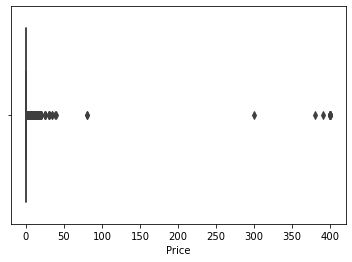

In [17]:
# i) Make suitable plot to identify outliers in price
sns.boxplot(x=df['Price'])

# ii) Do you expect apps on the play store to cost 
# $200? Check out these cases

## From above ,as we can see thier are few cases to cost $200 or more

In [18]:
# iv) Limit data to records with price < $30

df.drop(df[df['Price']>=30].index, inplace =True)

<AxesSubplot:xlabel='Price'>

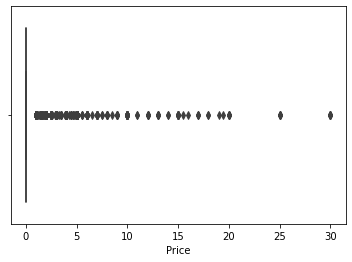

In [19]:
# iii) After dropping the useless records, make the suitable plot again to identify
# outliers

sns.boxplot(x=df['Price'])

## b) Reviews column

In [20]:
# ii) Limit data to apps with < 1 Million reviews
df.drop(df[df['Reviews']>=100000].index, inplace=True)

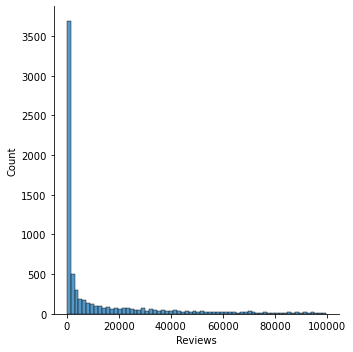

In [21]:
# i) Make suitable plot
sns.displot(df['Reviews'])

# c) Installs

In [22]:
# i) What is the 95th percentile of the installs?
df['Installs'].quantile(0.95)

5000000.0

In [23]:
# ii) Drop records having a value more than the 95th percentile
df  = df[df['Installs']<df['Installs'].quantile(0.95)]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,9367.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN,NaN
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.00000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,NaN,NaN,NaN
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.00000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.00000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,NaN,NaN,NaN
10834,FR Calculator,FAMILY,4.0,7,2600.00000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,NaN,NaN,NaN
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,NaN,NaN,NaN


# Data analysis to answer business questions
# Q5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

<AxesSubplot:xlabel='Rating', ylabel='Density'>

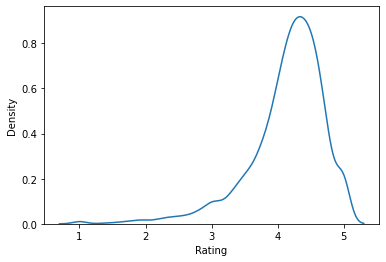

In [24]:
sns.kdeplot(data=df['Rating'])

## a) How do you explain this?
###      From Above Graph, Rating data is left skewed that is negatively skewed,it
###  most of the apps having rating more than four. 

## b) What is the implication of this on your analysis?
###      Have rating more than four (4), this indicates that most of the apps in playstore are liked  by the users

# Q6. What are the top Content Rating values?

## from Below Everyone and Teen is top 2  content Rating. 

<AxesSubplot:xlabel='count', ylabel='Content Rating'>

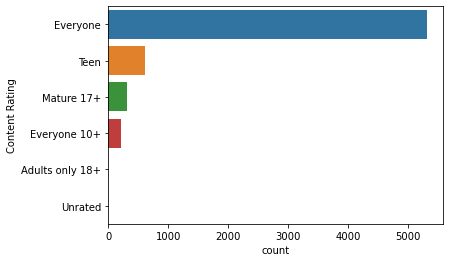

In [25]:
sns.countplot(y='Content Rating',data=df, order=df['Content Rating'].value_counts().index)

## a) Are there any values with very few records?

In [26]:
df['Content Rating'].value_counts()

Everyone           5312
Teen                607
Mature 17+          307
Everyone 10+        207
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

## b) If yes, drop those as they won’t help in the analysis

In [27]:
df.loc[df['Content Rating'] == 'Unrated']
df.drop([8266], inplace=True)

C:\Users\91750\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df.drop(df[df['Content Rating'] == 'Adults only 18+'].index, inplace=True)  # adults 18+ is deleted

# Q7. Effect of size on rating

## a) Make a joinplot to understand the effect of size on rating

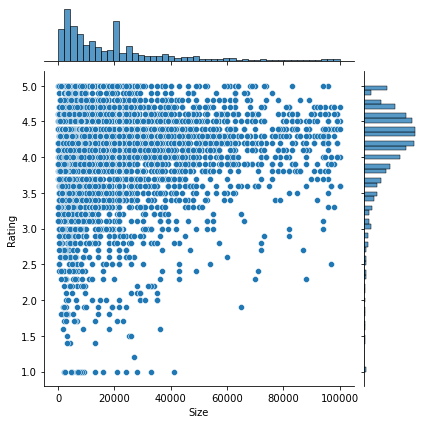

In [29]:
sns.jointplot(x='Size',y='Rating', data=df )

## b) Do you see any patterns?
### From above graph as the size of app increases  less no. of ratings  data .  

# c) How do you explain the pattern?
### 1.We can say that as app size increases less no of users will use it  
### 2. Most user gives rating more than 2.5 to larger size of apps it might be due  to its great functions.  

# Q8. Effect of price on rating

## a) Make a jointplot (with regression line)

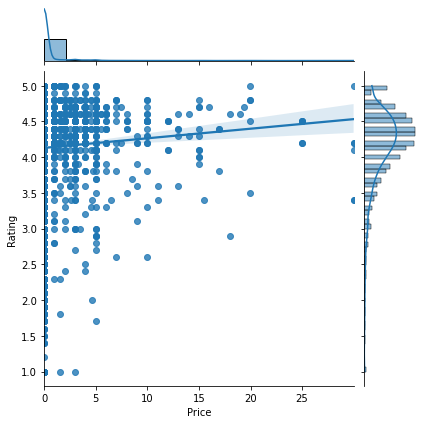

In [30]:
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')

## b) What pattern do you see?
### As the increase in app price  rating is also increased but also less no. of ratings

## c) How do you explain the pattern?
### 1. App with price cost $0 having large no. of users  rating
### 2. Increase in app price less no of users gives rating 
### 3. Apps with high cost also have high rating might be it have great features in it.

## d) Replot the data, this time with only records with price > 0

In [31]:
paid_apps = df['Price'] [df['Price']>0]  # apps with price >0
paid_apps

234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
         ...  
10690     0.99
10697     0.99
10760     7.99
10782    16.99
10785     1.20
Name: Price, Length: 617, dtype: float64

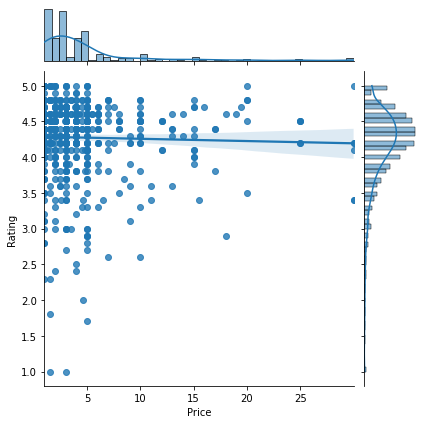

In [32]:
sns.jointplot(x=paid_apps, y='Rating', data=df, kind='reg')

## e) Does the pattern change?
###  yes,If only paid apps  then rating does not increase as in increase of price of apps but their is not much difference.   

## f) What is your overall inference on the effect of price on the rating
###  1. Free apps has more user rating
###  2. App with price (1-5) has also large no of ratings 
###  3. Apps with high cost (more than 5) has less no of user rating but their is high chance of great rating value  might be service of apps

# Q9. Look at all the numeric interactions together –

In [33]:
col= df[['Reviews','Size', 'Rating', 'Price']]  # reqd coln for pairplot 
num_col = col                                        

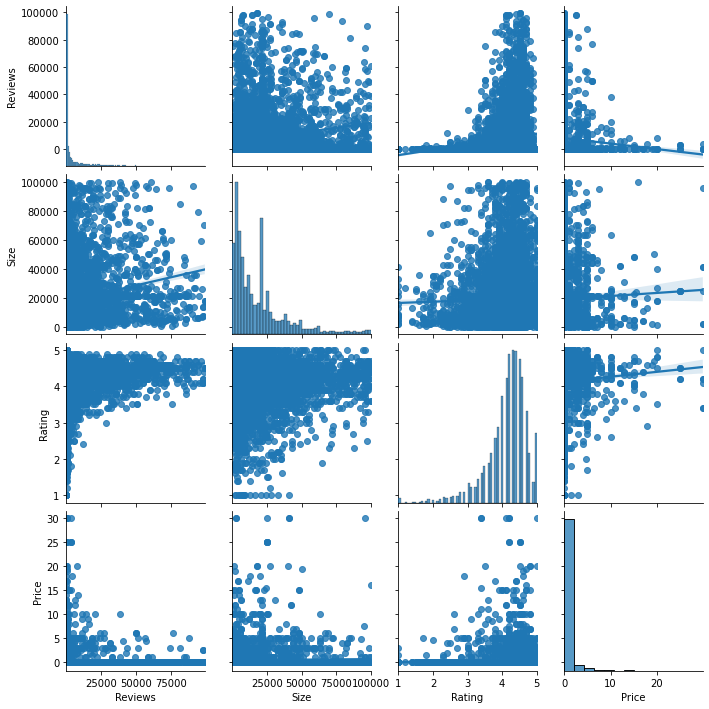

In [34]:
sns.pairplot(num_col, kind='reg')

# Q10. Rating vs. content rating

## a) Make a bar plot displaying the rating for each content rating

<AxesSubplot:xlabel='Content Rating'>

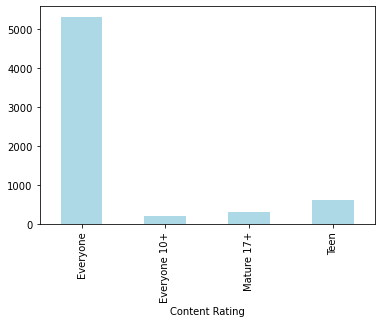

In [35]:
df.groupby('Content Rating') ['Rating'].count().plot.bar(color='lightblue')

## b)  Which metric would you use? Mean? Median? Some other quantile?
### In this case their are outliers in rating  so median is best for outliers

## c)  Choose the right metric and plot

<AxesSubplot:xlabel='Content Rating'>

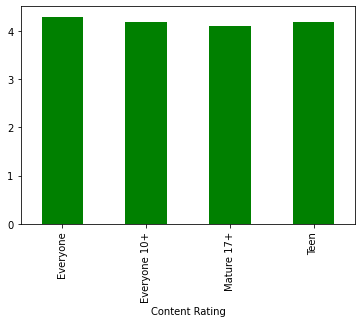

In [36]:
df.groupby('Content Rating') ['Rating'].median().plot.bar(color='g')

# Q11. Content rating vs. size vs. rating – 3 variables at a time

## a) Create 5 buckets (20% records in each) based on Size

In [42]:
bins = [0,20000,40000,60000,80000,100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k', '20-40k', '40-60', '60-80k', '80-100k'])

pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.129238,4.219444,3.961392,4.176190
20-40k,4.145952,4.080000,4.131250,4.144444
40-60,4.118076,4.215625,4.209375,4.193939
60-80k,4.194309,4.250000,4.181818,4.238095
80-100k,4.181373,4.192308,4.280000,4.182353


## b) By Content Rating vs. Size buckets, get the rating (20th percentile) for each
## combination

In [42]:
Rating_20per = pd.pivot_table(df, values='Rating', index='Bucket Size',
                              columns='Content Rating',aggfunc= lambda x: np.quantile(x,0.2) )

Rating_20per

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.5,3.8
20-40k,3.8,3.80,3.9,3.8
40-60,3.8,4.00,4.1,3.9
60-80k,3.9,3.98,3.9,3.9
80-100k,3.8,3.88,4.0,3.9


## c) Make a heatmap of this


### i. Annotated


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Everyone'),
  Text(1.5, 0, 'Everyone 10+'),
  Text(2.5, 0, 'Mature 17+'),
  Text(3.5, 0, 'Teen')])

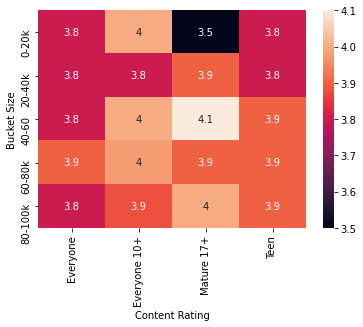

In [53]:
sns.heatmap(Rating_20per, annot=True)
plt.xticks(rotation=90)

### ii. Greens color map

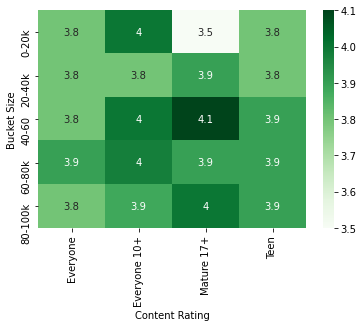

In [62]:
sns.heatmap(Rating_20per, cmap='Greens', annot=True)
plt.xticks(rotation=90);

## d) What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

### As more Dark color apps is in size 40-60 & 60-80  range so we can con conclude that most of the heavier apps gets highest rating in all categories.